In [8]:
from scipy.fftpack import fft
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

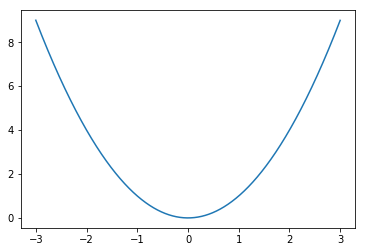

In [19]:
def f(x):
    return x ** 2
    
x_diff = 0.001
x_min = -3
x_max = 3
x_grid = np.arange(x_min, x_max, x_diff)
plt.plot(x_grid, f(x_grid))

In [39]:
# Fourier transform of the standard Gaussian distribution
def phi_fourier(t):
    return np.exp(-0.5 * (2 * np.pi * t) ** 2)

f_fft = fft(f(x_grid))
f_fft.shape

(6000,)

In [35]:
f_fft[0]

(18000.000999996035+0j)

In [37]:
def f_fourier(t):
    x_range = x_max - x_min
    t_ind = int(np.round(x_range * t))
    return x_range * np.exp(-2 * np.pi * 1j * x_min * t) * f_fft[t_ind]

(455.9513264378048-1.893353705669005e-09j)

In [42]:
def get_fourier_expectation(mu, sigma):
    return f_fourier(mu / (sigma ** 2)) * phi_fourier(mu / sigma) / sigma

get_fourier_expectation(mu=0, sigma=1)

(108000.00599997622+0j)